In [ ]:
#Install dplyr for loads %>%
install.packages("dplyr")
#Install phylobase for pdata
install.packages("phylobase")
#Install laresbernardo/lares for visualizing for vimp
devtools::install_github("laresbernardo/lares")
#Install corrplot for correlate plot
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘XML’, ‘plyr’, ‘reshape2’, ‘ade4’, ‘ape’, ‘rncl’, ‘RNeXML’





digest     (0.6.25 -> 0.6.26  ) [CRAN]
callr      (3.5.0  -> 3.5.1   ) [CRAN]
bitops     (NA     -> 1.0-6   ) [CRAN]
cpp11      (0.2.2  -> 0.2.3   ) [CRAN]
data.table (NA     -> 1.13.0  ) [CRAN]
zip        (NA     -> 2.1.1   ) [CRAN]
RCurl      (NA     -> 1.98-1.2) [CRAN]
rlist      (NA     -> 0.4.6.1 ) [CRAN]
pROC       (NA     -> 1.16.2  ) [CRAN]
patchwork  (NA     -> 1.0.1   ) [CRAN]
openxlsx   (NA     -> 4.2.2   ) [CRAN]
h2o        (NA     -> 3.32.0.1) [CRAN]
config     (NA     -> 0.3     ) [CRAN]


Installing 13 packages: digest, callr, bitops, cpp11, data.table, zip, RCurl, rlist, pROC, patchwork, openxlsx, h2o, config

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpCYUzui/remotes644b36351d/laresbernardo-lares-e8dad8e/DESCRIPTION’
─  preparing ‘lares’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘lares_4.9.6.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Install lib readxl
install.packages("readxl")
#Install lib plm
install.packages("plm")
# install package
install.packages("neuralnet")
#Install neuralnettool for variable importance
install.packages("NeuralNetTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘gbRd’, ‘rbibutils’, ‘bdsmatrix’, ‘zoo’, ‘sandwich’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Load and attaching library
library(readxl)
library(dplyr)
library(corrplot)
library(NeuralNetTools)
library(neuralnet)

In [ ]:
#Use the following file before running the runtime
#Link: https://drive.google.com/drive/folders/1M8HXoJ2UfKsjxKbalgJH9tu8QyJGzIj8?usp=sharing
Sample_Train <- read_excel("Regression Data Train.xlsx")
Sample_Test <- read_excel("Regression Data Test.xlsx")
Sample<- read_excel("Regression Data.xlsx")

In [ ]:
#Normalize function
normalize <- function(x) {
    (x - min(x)) / (max(x) - min(x))
  }
#Normalizing Training Sample
Data <- Sample[complete.cases(Sample),]
Data <- Data %>% select_if(is.numeric)
Data_Norm <- as.data.frame(lapply(Data,normalize))
Data_Norm$FirmNo<-Sample$FirmNo
Data_Norm$obs<-Sample$obs

In [ ]:
Data_Test_Norm<-subset(Data_Norm, obs <= 6)
Data_Train_Norm<-subset(Data_Norm, obs > 6)

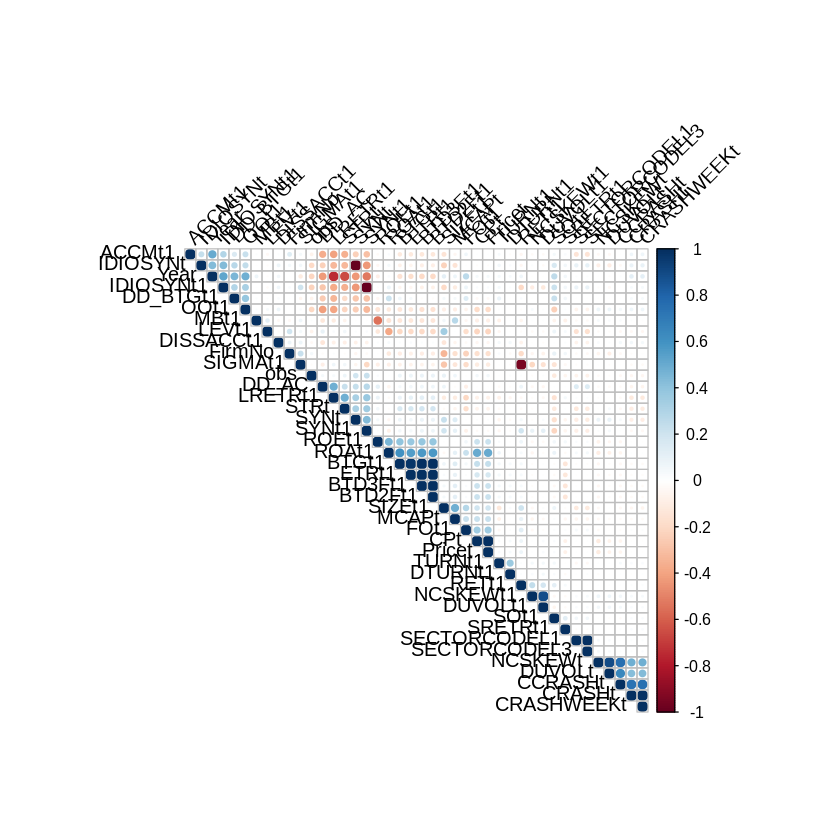

In [ ]:
corrTrain <- cor(Data_Train_Norm) # Select best 5 correlated values.
corrplot(corrTrain, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [ ]:
# Multiple Linear Regression Example
fit <- lm(NCSKEWt ~ BTD2Ft1 + NCSKEWt1 + RETt1 + SIGMAt1 + SIZEt1 + MBt1 + LEVt1 + ROAt1 + DISSACCt1 + FOt1+ TURNt1 + factor(SECTORCODEL1) + factor(Year), data=Data_Train_Norm)
summary(fit) # show results
#Computing prediction
predicted_LM<-predict.lm(fit,Data_Test_Norm)


Call:
lm(formula = NCSKEWt ~ BTD2Ft1 + NCSKEWt1 + RETt1 + SIGMAt1 + 
    SIZEt1 + MBt1 + LEVt1 + ROAt1 + DISSACCt1 + FOt1 + TURNt1 + 
    factor(SECTORCODEL1) + factor(Year), data = Data_Train_Norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49579 -0.03580  0.00828  0.04840  0.46622 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.742531   0.211653   3.508 0.000459 ***
BTD2Ft1                                0.164595   0.116261   1.416 0.156974    
NCSKEWt1                               0.063203   0.022525   2.806 0.005055 ** 
RETt1                                 -0.151100   0.200371  -0.754 0.450858    
SIGMAt1                               -0.077001   0.130043  -0.592 0.553825    
SIZEt1                                -0.004665   0.014791  -0.315 0.752474    
MBt1                                   0.082679   0.038070   2.172 0.029965 *  
LEVt1                                 -0.

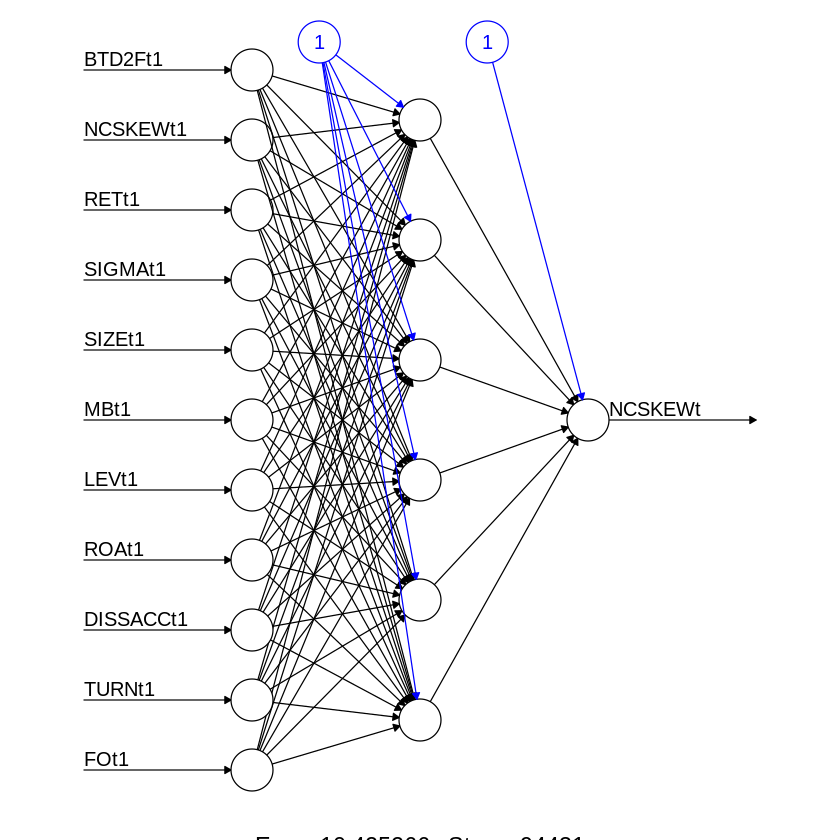

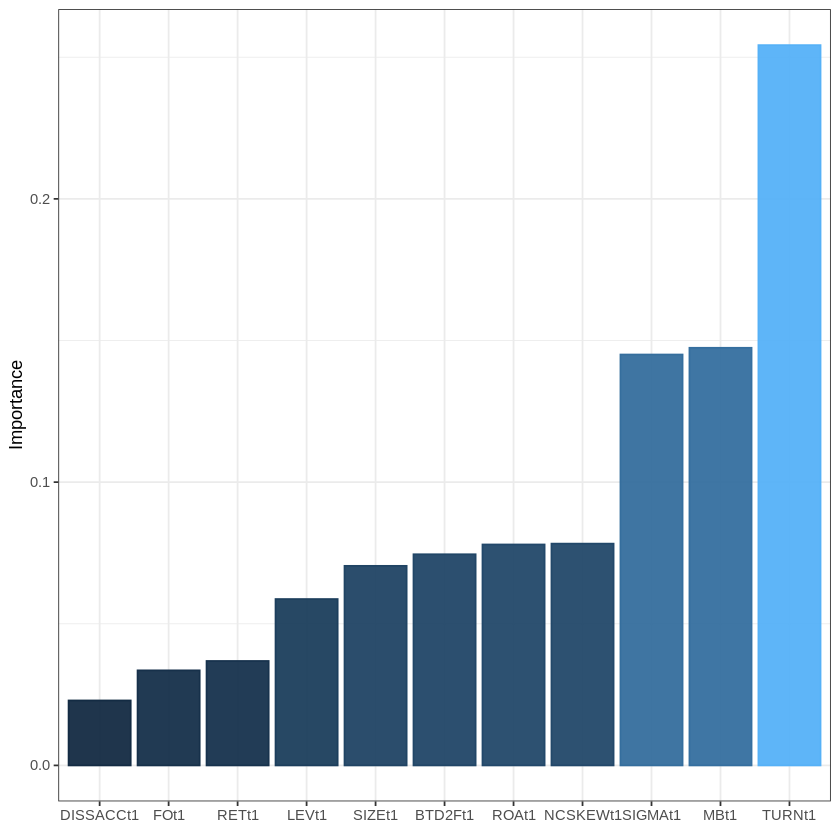

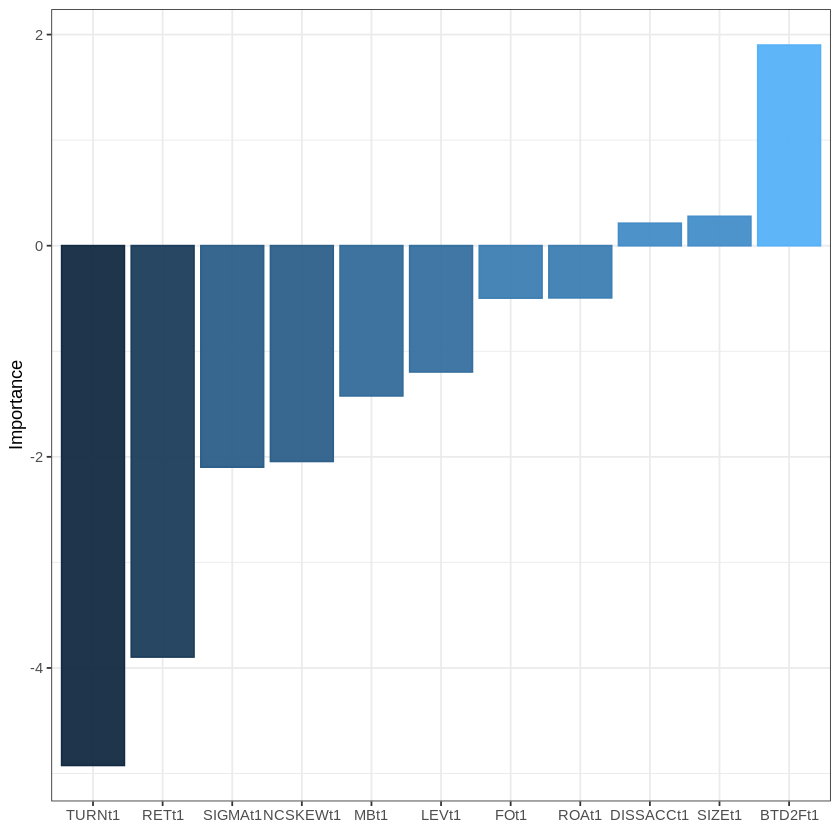

In [216]:
# load library
require(neuralnet)
# Neural net regression
nn=neuralnet(NCSKEWt ~ BTD2Ft1 + NCSKEWt1 + RETt1 + SIGMAt1 + SIZEt1 + MBt1 + LEVt1 + ROAt1 + DISSACCt1 + TURNt1 + FOt1 , data=Data_Train_Norm, hidden = 6,
  stepmax = 1e+07, linear.output = TRUE)
# plot neural network
plot(nn, rep = "best",show.weights = FALSE)
#Computing prediction
Predicted_NN<-neuralnet::compute(nn,Data_Test_Norm)
#Visualizing variables importance
garson(nn) 
olden(nn)


In [217]:
#Append Prediction result from Linear Regression, NeuralNet Regression and Real values into a dataframe
resultDF <- cbind(Predicted_NN$net.result,predicted_LM,Data_Test_Norm$NCSKEWt)
resultDF <- as.data.frame(resultDF)
colnames(resultDF)<- c("NeuralNet", "LinearReg", "Real")


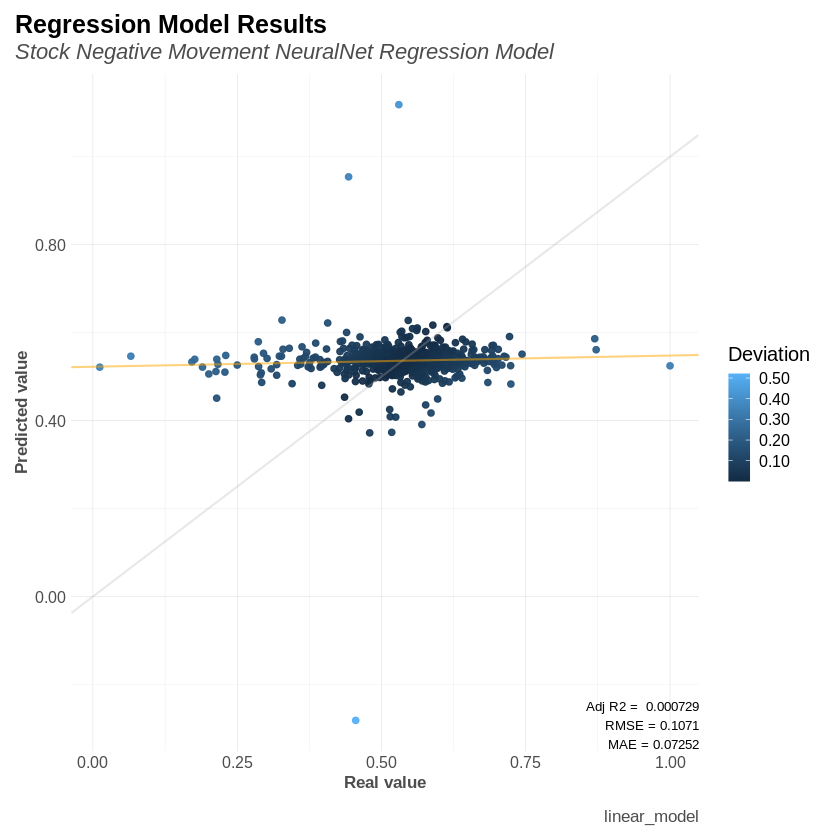

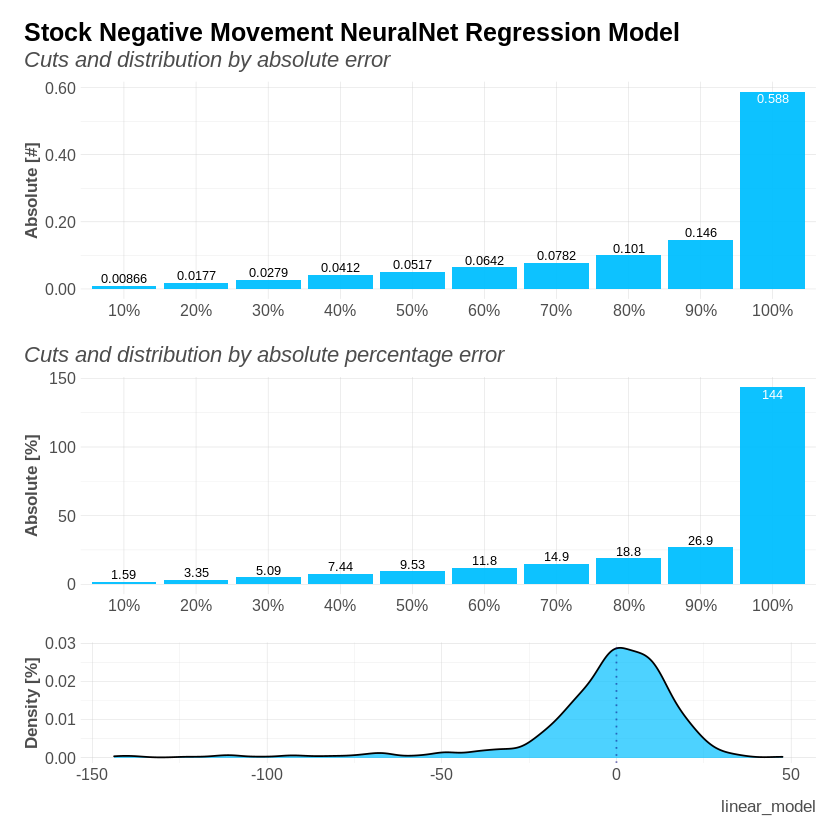

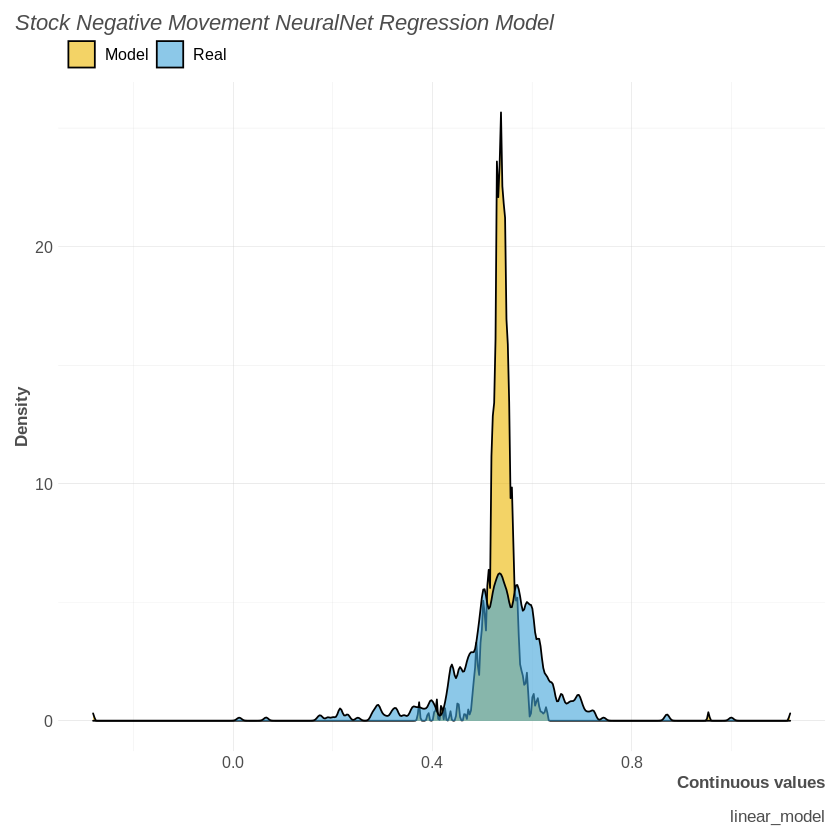

In [218]:
#Visualizing prediction result from NeuralNet Regression
lares::mplot_lineal(tag = resultDF$Real, 
                    score = resultDF$NeuralNet,
                    subtitle = "Stock Negative Movement NeuralNet Regression Model",
                    model_name = "linear_model")

lares::mplot_cuts_error(tag = resultDF$Real, 
                    score = resultDF$NeuralNet,
                        title = "Stock Negative Movement NeuralNet Regression Model",
                        model_name = "linear_model")

lares::mplot_density(tag = resultDF$Real, 
                    score = resultDF$NeuralNet,
                     subtitle = "Stock Negative Movement NeuralNet Regression Model",
                     model_name = "linear_model")

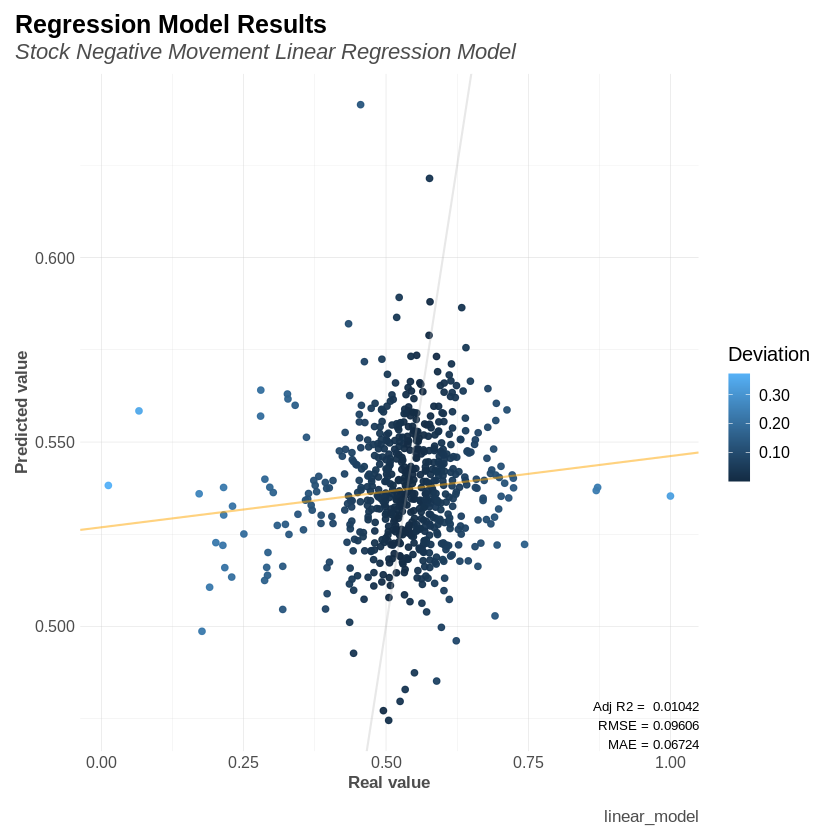

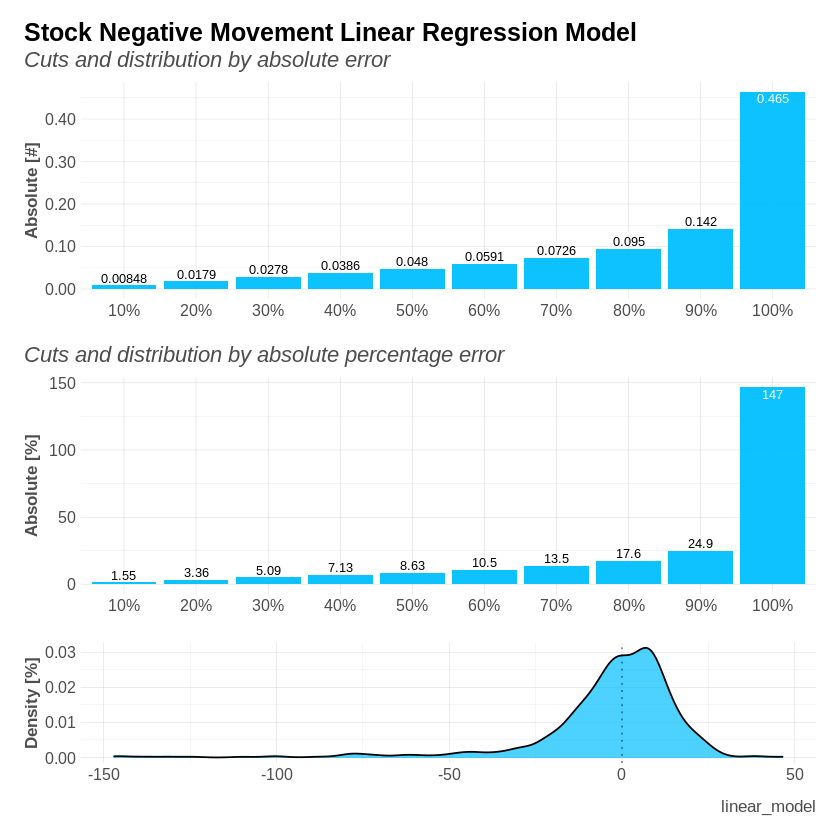

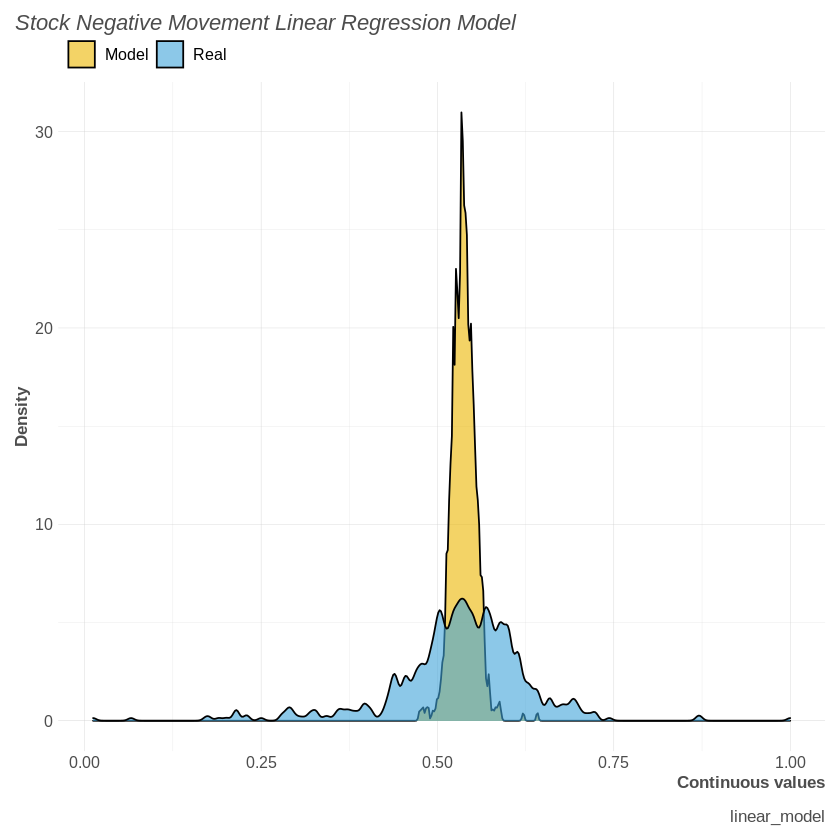

In [219]:
#Visualizing prediction result from Linear Regression
lares::mplot_lineal(tag = resultDF$Real, 
                    score = resultDF$LinearReg,
                    subtitle = "Stock Negative Movement Linear Regression Model",
                    model_name = "linear_model")

lares::mplot_cuts_error(tag = resultDF$Real, 
                    score = resultDF$LinearReg,
                        title = "Stock Negative Movement Linear Regression Model",
                        model_name = "linear_model")

lares::mplot_density(tag = resultDF$Real, 
                    score = resultDF$LinearReg,
                     subtitle = "Stock Negative Movement Linear Regression Model",
                     model_name = "linear_model")


In [ ]:
write.csv(resultDF,"resultDF.csv", row.names = TRUE)

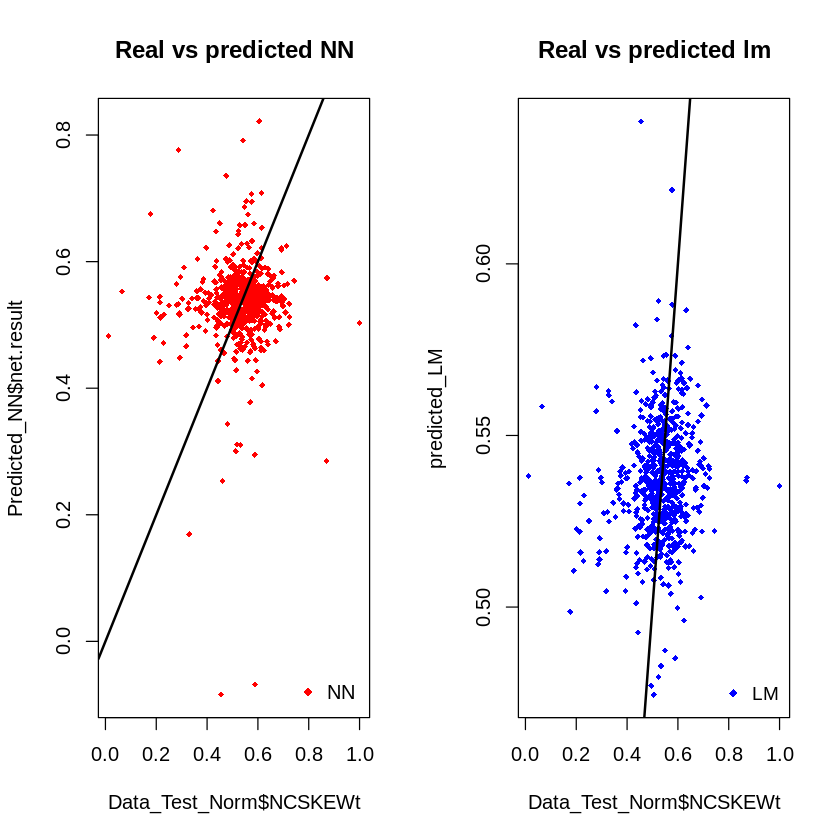

In [ ]:
par(mfrow=c(1,2))
plot(Data_Test_Norm$NCSKEWt,Predicted_NN$net.result,col='red',main='Real vs predicted NN',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN',pch=18,col='red', bty='n')
plot(Data_Test_Norm$NCSKEWt,predicted_LM,col='blue',main='Real vs predicted lm',pch=18, cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='LM',pch=18,col='blue', bty='n', cex=.95)